In [17]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sympy as sp
import math
from sympy import *
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False
%matplotlib inline

In [18]:
cv2.__version__

'4.8.0'

In [19]:
import PIL
PIL.__version__

'10.0.0'

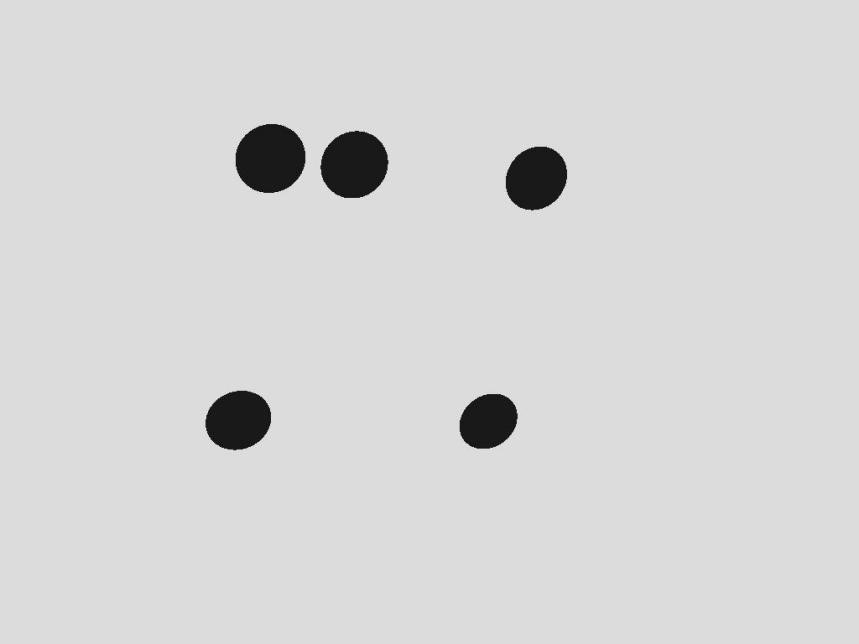

In [20]:
im=Image.open('picture1.jpg')
im

In [21]:
#以灰度图片的格式读取
imge=cv2.imread('picture1.jpg',cv2.IMREAD_GRAYSCALE)
imge.shape

(644, 859)

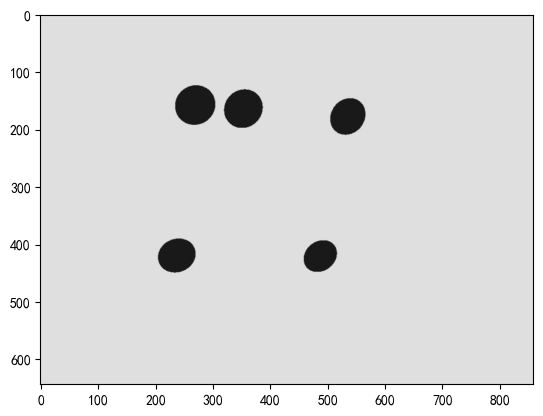

In [22]:
plt.imshow(imge,cmap='gray')

In [23]:
#将图片的大小调整为1024*768
resized_image=cv2.resize(imge,(1024,768),interpolation = cv2.INTER_LINEAR)
resized_image.shape

(768, 1024)

In [24]:
#存储变量，统计不同像素点的个数
l=np.zeros((768,1024))
A={}
for i in range(768):
    for j in range(1024):
        if resized_image[i][j] not in A:
            A[resized_image[i][j]]=1
        else:
            A[resized_image[i][j]]+=1
        l[i][j]=resized_image[i][j]
dict=sorted(A.items(),key=lambda x:x[0],reverse=True)
for a,b in dict:
    print(a,b)

246 1
242 1
241 2
238 3
237 1
236 3
235 4
234 13
233 13
232 11
231 25
230 26
229 43
228 80
227 102
226 158
225 227
224 290
223 392
222 544
221 888
220 756072
219 1111
218 657
217 505
216 343
215 264
214 202
213 149
212 118
211 104
210 74
209 49
208 51
207 53
206 49
205 31
204 36
203 23
202 22
201 18
200 16
199 15
198 14
197 15
196 8
195 13
194 12
193 13
192 11
191 15
190 15
189 13
188 22
187 31
186 14
185 15
184 14
183 22
182 21
181 24
180 18
179 21
178 20
177 13
176 17
175 23
174 11
173 17
172 17
171 19
170 23
169 19
168 15
167 22
166 18
165 28
164 23
163 29
162 16
161 27
160 20
159 19
158 17
157 21
156 23
155 23
154 21
153 16
152 15
151 21
150 6
149 11
148 14
147 11
146 8
145 4
144 14
143 11
142 9
141 14
140 11
139 6
138 2
137 7
136 4
135 5
134 2
132 1
122 1
121 1
118 1
112 1
110 4
109 8
108 7
107 4
106 6
105 11
104 8
103 16
102 12
101 13
100 11
99 13
98 3
97 10
96 12
95 9
94 14
93 10
92 19
91 13
90 13
89 16
88 17
87 20
86 19
85 25
84 20
83 23
82 26
81 29
80 21
79 27
78 19
77 29
76 2

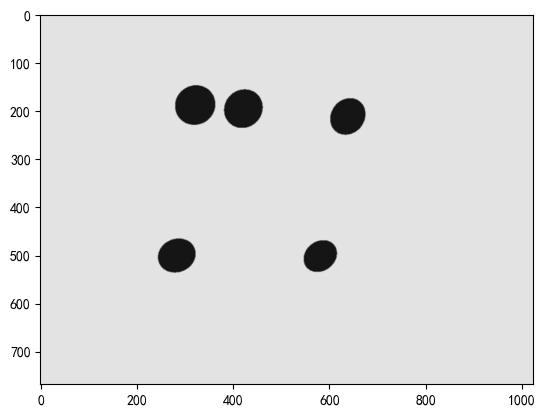

In [25]:
plt.imshow(resized_image,cmap='gray')

In [26]:
resized_image[200,312]

25

In [27]:
resized_image[0,0]

220

In [28]:
#存储边界以内的点
x=[]
y=[]
for i in range(768):
    for j in range(1024):
        if resized_image[i,j]<200:
            if resized_image[i-1,j]<200 and resized_image[i+1,j]<200 \
            and resized_image[i,j-1]<200 and resized_image[i,j+1]<200:
                x.append(i)
                y.append(j)

In [29]:
len(x)

22555

In [30]:
768*1024

786432

In [31]:
# 将边界以内的点的像素值改为220
for i,j in zip(x,y):
    resized_image[i,j]=220

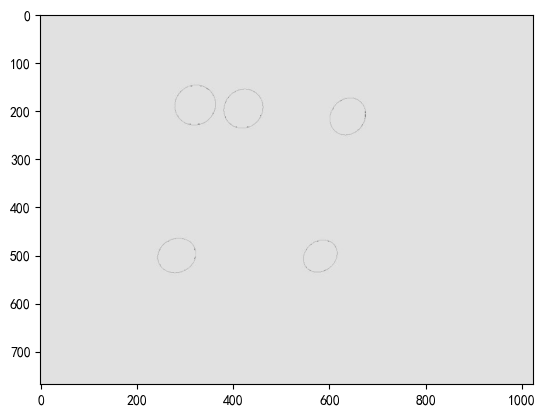

In [32]:
#绘制图像
plt.imshow(resized_image,cmap='gray')
plt.savefig('picture2.pdf',dpi=300)

In [33]:
# 获取不同椭圆的边界点坐标
def getedge(x,y,x_start,x_end,y_start,y_end):
    
    area=0
    for i in range(x_start,x_end):
        for j in range(y_start,y_end):
            #降噪处理
            if resized_image[i][j]<200:
                y.append(767-i+0.5)
                x.append(j+0.5)
            if l[i][j]<180:
                area+=1
    #返回每个椭圆的面积
    return area
                
x1,y1=[],[]
x2,y2=[],[]
x3,y3=[],[]
x4,y4=[],[]
x5,y5=[],[]
area1=getedge(x1,y1,x_start=100,x_end=300,y_start=200,y_end=370)
area2=getedge(x2,y2,x_start=100,x_end=300,y_start=370,y_end=500)
area3=getedge(x3,y3,x_start=100,x_end=300,y_start=500,y_end=700)
area4=getedge(x4,y4,x_start=400,x_end=600,y_start=200,y_end=400)
area5=getedge(x5,y5,x_start=400,x_end=600,y_start=500,y_end=700)
print(area1,area2,area3,area4,area5)

5545 5192 4474 4464 3658


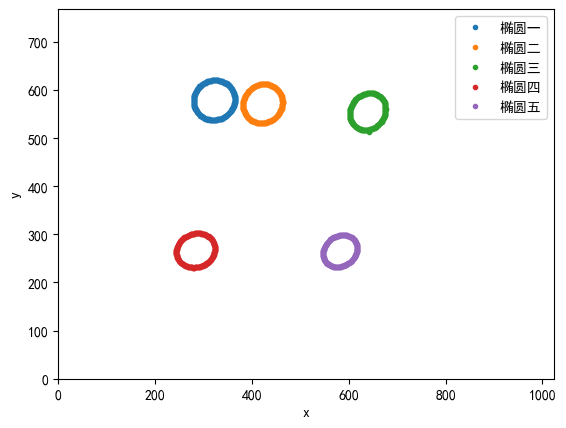

In [34]:
# 绘制图像
plt.plot(x1,y1,'.', label='椭圆一')
plt.plot(x2,y2,'.', label='椭圆二')
plt.plot(x3,y3,'.', label='椭圆三')
plt.plot(x4,y4,'.', label='椭圆四')
plt.plot(x5,y5,'.', label='椭圆五')
plt.xlim(0,1024)
plt.ylim(0,768)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('picture3.pdf',dpi=300)

In [35]:
# 椭圆拟合
def fit_elliptic(x,y,X_s,X_e,Y_s,Y_e,saveindex):

    #构建系数矩阵
    A=np.zeros((5,5))
    B=np.zeros((5,1))
    for _x,_y in zip(x,y):
        A[0,0]+=_x**2*_y**2
        A[0,1]+=_x*_y**3
        A[0,2]+=_x**2*_y
        A[0,3]+=_x*_y**2
        A[0,4]+=_x*_y
        A[1,0]+=_x*_y**3
        A[1,1]+=_y**4
        A[1,2]+=_x*_y**2
        A[1,3]+=_y**3
        A[1,4]+=_y**2
        A[2,0]+=_x**2*_y
        A[2,1]+=_x*_y**2
        A[2,2]+=_x**2
        A[2,3]+=_x*_y
        A[2,4]+=_x
        A[3,0]+=_x*_y**2
        A[3,1]+=_y**3
        A[3,2]+=_x*_y
        A[3,3]+=_y**2
        A[3,4]+=_y
        A[4,0]+=_x*_y
        A[4,1]+=_y**2
        A[4,2]+=_x
        A[4,3]+=_y
        A[4,4]+=1
        B[0,0]+=_x**3*_y
        B[1,0]+=_x**2*_y**2
        B[2,0]+=_x**3
        B[3,0]+=_x**2*_y
        B[4,0]+=_x**2
    #求解
    c=np.linalg.solve(A,-B)
    X=sp.Symbol('x')
    Y=sp.Symbol('y')
    b,c,d,e,f=c[0,0],c[1,0],c[2,0],c[3,0],c[4,0]
    p=(2*c*d-b*e)/(4*c-b**2)
    q=(2*e-b*d)/(4*c-b**2)
    f_=f-p**2-c*q**2-b*p*q
    #求解长轴和短轴
    A_eig=np.array([[1/(-f_),b/(-2*f_)],[b/(-2*f_),c/(-f_)]])
    eigenvalue, eigenvector = np.linalg.eig(A_eig)
    #输出长短轴
    print(sqrt(1/eigenvalue[0]),sqrt(1/eigenvalue[1]))
    #输出面积
    print(math.pi*sqrt(1/(eigenvalue[0]*eigenvalue[1])))
    
    #绘制图像
    lll=(b*X+e)**2-4*c*(X**2+d*X+f)
    llll=lll.expand()
    x_min,x_max=solve(llll)
    print(x_min,x_max)

    data_x=np.arange(x_min,x_max,1)
    data_x=np.append(data_x,x_max)

    data_y1=[0]*len(data_x)
    data_y2=[0]*len(data_x)
    formula=X**2+b*X*Y+c*Y**2+d*X+e*Y+f
    for i in range(len(data_x)):
        formula_i=formula.evalf(subs={X:data_x[i]})
        data_y1[i],data_y2[i]=solve(formula_i)
        data_y1[i],data_y2[i]=sp.re(data_y1[i]),sp.re(data_y2[i])
    y_fit=np.append(data_y1,data_y2[::-1])
    x_data=np.append(data_x,data_x[::-1])

    plt.plot(x,y,'.',label='拟合数据点')
    plt.plot(x_data,y_fit,label='拟合椭圆')
    plt.xlim(X_s,X_e)
    plt.ylim(Y_s,Y_e)
    # plt.title('椭圆{}'.format(saveindex))
    plt.legend()
    plt.savefig('Ellipse{}.pdf'.format(saveindex),dpi=300)
    
    return X**2+b*X*Y+c*Y**2+d*X+e*Y+f,(X+p)**2+b*(X+p)*(Y+q)+c*(Y+q)**2+f_


42.8755430086675 40.8633914591405
5504.19630062879
280.092202820276 364.639372778118
5545
x^{2} - 0.0900824920776994 x y - 592.57189189858 x + 1.03833830728421 y^{2} - 1173.40052631325 y + 433440.8502602


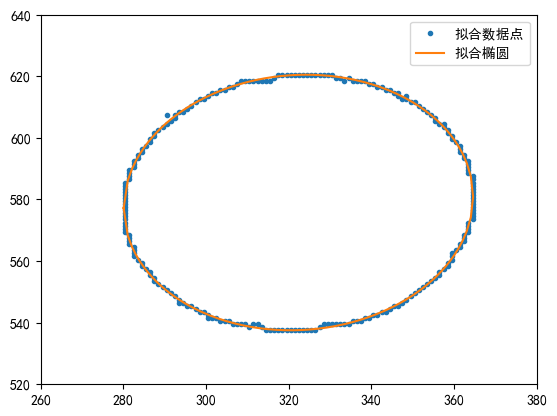

In [36]:
formula1,formula1_stan=fit_elliptic(x1,y1,X_s=260,X_e=380,Y_s=520,Y_e=640,saveindex='1')
print(area1)
print(sp.latex(formula1))

41.8822717617791 39.0938947820857
5143.85885125892
381.986679598304 463.068946990244
5192
x^{2} - 0.1377427334114 x y - 766.325622707146 x + 1.00287376954665 y^{2} - 1088.2306602714 y + 471262.673737823


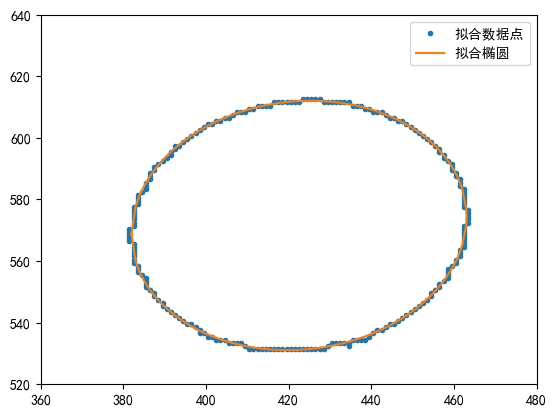

In [37]:
formula2,formula2_stan=fit_elliptic(x2,y2,X_s=360,X_e=480,Y_s=520,Y_e=640,saveindex='2')
print(area2)
print(sp.latex(formula2))

35.0584717842496 40.2822264387349
4436.66175732199
602.361504134733 676.284649924919
4474
x^{2} - 0.252423855719711 x y - 1138.47718464984 x + 0.919602340319622 y^{2} - 859.915407619206 y + 601336.985531152


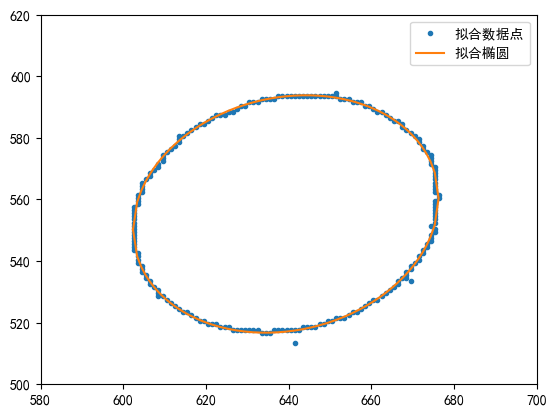

In [38]:
formula3,formula3_stan=fit_elliptic(x3,y3,X_s=580,X_e=700,Y_s=500,Y_e=620,saveindex='3')
print(area3)
print(sp.latex(formula3))

40.3106783148759 34.9340215298776
4424.03508423471
244.670621901385 323.673577927219
4464
x^{2} - 0.23063586894458 x y - 506.825899563694 x + 1.21432166463452 y^{2} - 582.260126918689 y + 148123.736415128


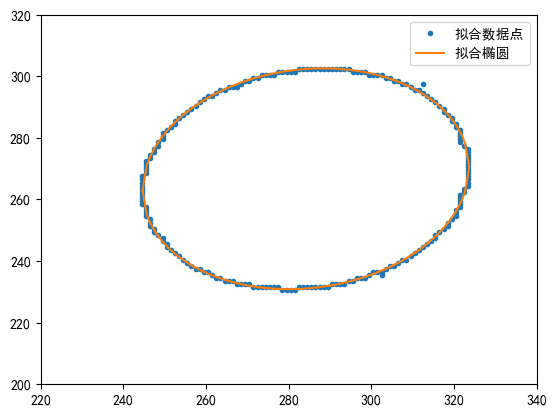

In [39]:
formula4,formula4_stan=fit_elliptic(x4,y4,X_s=220,X_e=340,Y_s=200,Y_e=320,saveindex='4')
print(area4)
print(sp.latex(formula4))

37.2328566002455 30.8883836902119
3613.02871971429
547.166129480212 617.334197370557
3658
x^{2} - 0.373859327419405 x y - 1065.24486907071 x + 1.10942071675991 y^{2} - 371.39785695332 y + 358228.361125502


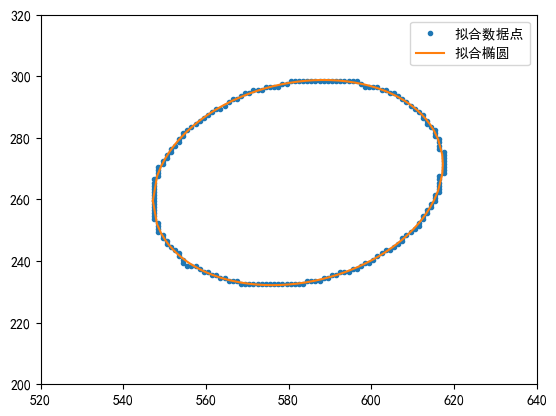

In [40]:
formula5,formula5_stan=fit_elliptic(x5,y5,X_s=520,X_e=640,Y_s=200,Y_e=320,saveindex='5')
print(area5)
print(sp.latex(formula5))